### Demo of a SVM classifier on a simulated dataset

In this demo, we create an artificial dataset of 10 classes. Each classes
is a 2D normal distribution of points with a mean and variance picked at random.

The following code generated the dataset by picking the mean and variance of each class
from an uniform distribution and generated 100 samples per class.

In [6]:
import numpy as np
import pandas as pd
np.random.seed(1)

classes = 10
group_size = 100
x = []
y = []
for c in range(classes):
    g = np.random.normal(loc=np.random.uniform(-20, 20, 2), scale=np.random.uniform(1, 5, 2), size=(group_size, 2))
    x.append(g)
    y.append(np.ones(group_size) * c)
    
x = np.concatenate(x)
y = np.concatenate(y).astype(int)

Plotting the generated dataset

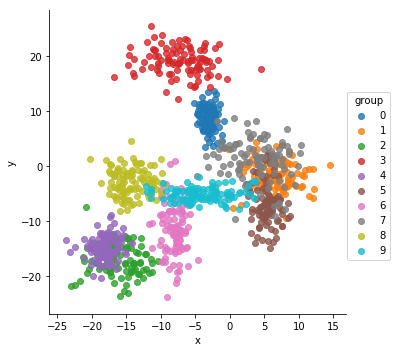

In [7]:
%matplotlib inline
import seaborn as sns

df = pd.DataFrame(dict(x=x[:, 0], y=x[:, 1], group=y))

sns.lmplot('x', # Horizontal axis
           'y', # Vertical axis
           data=df, # Data source
           fit_reg=False, # Don't fix a regression line
           hue='group')

Some of the classes are well separated and some have significant overlaps. Since this data is
not linearly seperable, we fit an RBF kernel SVM

Split the dataset into test and train sets:

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

Fit the model:

In [9]:
from lib.model import Model
from sklearn.metrics import accuracy_score

options = dict(
    standardize = True,
    l2_lambda = 1,
    kernel = dict(
        fn = 'rbf',
        gamma = 10
    )
)

model = Model(options)
model.fit(x_train, y_train)

100%|██████████| 45/45 [00:01<00:00, 28.25it/s]


Predict on the test set:

In [10]:
yhat = model.predict(x_test)
accuracy_score(yhat, y_test)

0.848

The test accuracy is about 85%, which is much better that what we would have got with a linear model.

The following plot shows the actual classes of the test dataset:

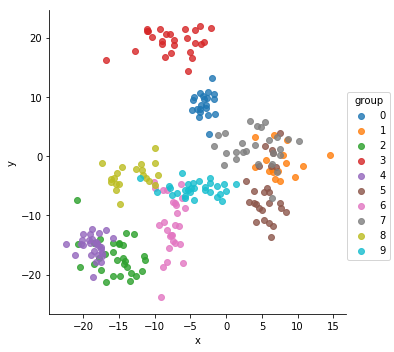

In [11]:
df = pd.DataFrame(dict(x=x_test[:, 0], y=x_test[:, 1], group=y_test))
sns.lmplot('x', 'y', data=df, fit_reg=False, hue='group')

The following plot shows the classes as predicted by the model.

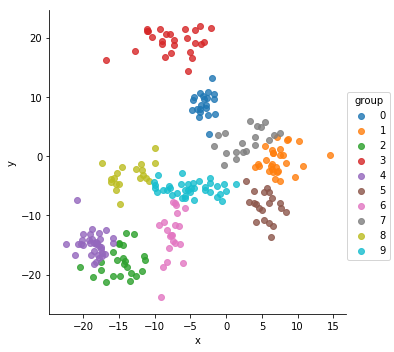

In [12]:
df = pd.DataFrame(dict(x=x_test[:, 0], y=x_test[:, 1], group=yhat))
sns.lmplot('x', 'y', data=df, fit_reg=False, hue='group')

Plotting the classification regions:

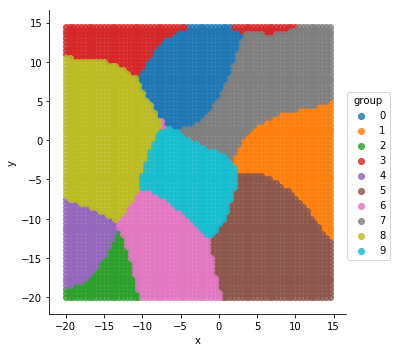

In [13]:
import itertools
span = list(range(-40, 30))
surface_x = np.array(list(itertools.product(span, span)))/2
yhat_s = model.predict(surface_x)
df = pd.DataFrame(dict(x=surface_x[:, 0], y=surface_x[:, 1], group=yhat_s))

sns.lmplot('x', 'y', data=df, fit_reg=False, hue='group')

The above plot shows that the classification boundary is highly non-linear.

Error vs Training iterations

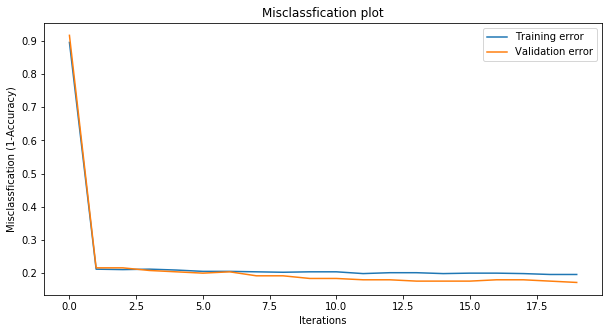

In [14]:
model.plot(x_train, y_train, x_test, y_test, iters=20)

The model converges in under 2 iterations.